In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가 
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import pyplot as plt 
%matplotlib inline 

import seaborn as sns

# 정규화 
from sklearn.preprocessing import MinMaxScaler

# 한글 폰트 설정
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (14,4)

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_excel('/Users/dongyokim/main/jupyter/2022:2/Movie_Project/분석/운항 + 배출계수.xlsx', index_col=0)

In [3]:
data.head()

,기종(좌석수),운항편명,항공사,출발공항,도착공항,출발시간,도착시간,운항일자,운항시간,기종,...,total_fuel(kg),CO2(kgCO2eq),CH4(kgCO2eq),N2O(kgCO2eq),total_emmission(kgCO2eq),연도,월,출발시각,도착시각,요일
0,A330-300(272),KE1233,대한항공,GMP,CJU,1355,1505,2018-06-01,70,A330-300,...,5036.25,15889.6875,0.13,87.19375,15977.01125,2018,6,13,15,4
1,B737-700(126),KE1245,대한항공,GMP,CJU,1600,1710,2018-06-01,70,B737-700,...,2221.29,7000.0635,0.09,44.77999,7044.93349,2018,6,16,17,4
2,B737-700(126),KE1207,대한항공,GMP,CJU,830,940,2018-06-01,70,B737-700,...,2221.29,7000.0635,0.09,44.77999,7044.93349,2018,6,8,9,4
3,A330-300(272),KE1207,대한항공,GMP,CJU,830,940,2018-06-01,70,A330-300,...,5036.25,15889.6875,0.13,87.19375,15977.01125,2018,6,8,9,4
4,B737-800(189),LJ331,진에어,GMP,CJU,1720,1825,2018-06-01,65,B737-800,...,2429.05,7659.5075,0.07,48.12055,7707.69805,2018,6,17,18,4


In [4]:
numerical_feats = list(data.select_dtypes(exclude='object'))

In [5]:
# 수치형 변수만 뽑아보자

X = data[numerical_feats].drop('seats', axis=1)
numerical_feats = list(X.select_dtypes(exclude='object'))
y = data[['항공사']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7126 entries, 0 to 1697
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   기종(좌석수)                   7126 non-null   object 
 1   운항편명                      7126 non-null   object 
 2   항공사                       7126 non-null   object 
 3   출발공항                      7126 non-null   object 
 4   도착공항                      7126 non-null   object 
 5   출발시간                      7126 non-null   int64  
 6   도착시간                      7126 non-null   int64  
 7   운항일자                      7126 non-null   object 
 8   운항시간                      7126 non-null   int64  
 9   기종                        7126 non-null   object 
 10  제조사                       7126 non-null   object 
 11  좌석수                       7126 non-null   int64  
 12  길이(m)                     7126 non-null   float64
 13  날개 폭(m)                   7126 non-null   float64
 14  높이(m)   

In [7]:
X = X[['total_emmission(kgCO2eq)', '좌석수']]

numerical_feats = list(X.select_dtypes(exclude='object'))

In [8]:
# 정규화 
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출.
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=numerical_feats)

<AxesSubplot:xlabel='total_emmission(kgCO2eq)', ylabel='좌석수'>

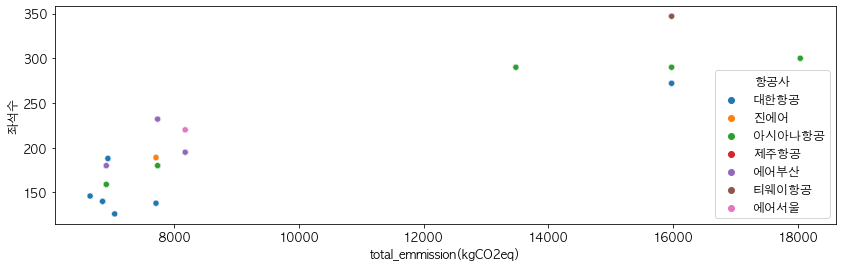

In [9]:
sns.scatterplot(data=data, x='total_emmission(kgCO2eq)', y='좌석수', hue='항공사')

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(X)
kmeans.fit_predict(X)
data['cluster'] = kmeans.labels_

In [11]:
# iris의 모든 개별 데이터에 실루엣 계수 값을 구함 
score_samples = silhouette_samples(X, data['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF 실루엣 계수 칼럼 추가
data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(X, data['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
X.head()

silhouette_samples() return 값의 shape (7126,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.801


,total_emmission(kgCO2eq),좌석수
0,0.818784,0.660633
1,0.034604,0.000000
2,0.034604,0.000000
3,0.818784,0.660633
4,0.092791,0.285068


In [12]:
# 군집화 시각화
# 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

data['pca_x'] = pca_transformed[:, 0]
data['pca_y'] = pca_transformed[: ,1]
data.head(3)

,기종(좌석수),운항편명,항공사,출발공항,도착공항,출발시간,도착시간,운항일자,운항시간,기종,...,total_emmission(kgCO2eq),연도,월,출발시각,도착시각,요일,cluster,silhouette_coeff,pca_x,pca_y
0,A330-300(272),KE1233,대한항공,GMP,CJU,1355,1505,2018-06-01,70,A330-300,...,15977.01125,2018,6,13,15,4,1,0.878086,0.702707,-0.129299
1,B737-700(126),KE1245,대한항공,GMP,CJU,1600,1710,2018-06-01,70,B737-700,...,7044.93349,2018,6,16,17,4,2,0.917728,-0.322624,-0.137719
2,B737-700(126),KE1207,대한항공,GMP,CJU,830,940,2018-06-01,70,B737-700,...,7044.93349,2018,6,8,9,4,2,0.917728,-0.322624,-0.137719


In [13]:
pca_data = data[['pca_x', 'pca_y']]

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, random_state=0).fit(pca_data)
kmeans.fit_predict(pca_data)
data['cluster'] = kmeans.labels_

In [14]:
data

,기종(좌석수),운항편명,항공사,출발공항,도착공항,출발시간,도착시간,운항일자,운항시간,기종,...,total_emmission(kgCO2eq),연도,월,출발시각,도착시각,요일,cluster,silhouette_coeff,pca_x,pca_y
0,A330-300(272),KE1233,대한항공,GMP,CJU,1355,1505,2018-06-01,70,A330-300,...,15977.01125,2018,6,13,15,4,1,0.878086,0.702707,-0.129299
1,B737-700(126),KE1245,대한항공,GMP,CJU,1600,1710,2018-06-01,70,B737-700,...,7044.93349,2018,6,16,17,4,2,0.917728,-0.322624,-0.137719
2,B737-700(126),KE1207,대한항공,GMP,CJU,830,940,2018-06-01,70,B737-700,...,7044.93349,2018,6,8,9,4,2,0.917728,-0.322624,-0.137719
3,A330-300(272),KE1207,대한항공,GMP,CJU,830,940,2018-06-01,70,A330-300,...,15977.01125,2018,6,8,9,4,1,0.878086,0.702707,-0.129299
4,B737-800(189),LJ331,진에어,GMP,CJU,1720,1825,2018-06-01,65,B737-800,...,7707.69805,2018,6,17,18,4,4,0.820042,-0.095948,0.044674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,A321-200(195),BX8026,에어부산,CJU,CJU,930,1040,2022-12-01,70,A321-200,...,8176.29109,2022,12,9,10,3,0,0.808365,-0.046948,0.039333
1694,A321-neo(232),BX8028,에어부산,CJU,CJU,1310,1420,2022-12-01,70,A321-neo,...,7733.52770,2022,12,13,14,3,5,0.645106,0.029932,0.193055
1695,A321-200(195),BX8028,에어부산,CJU,CJU,1310,1420,2022-12-01,70,A321-200,...,8176.29109,2022,12,13,14,3,0,0.808365,-0.046948,0.039333
1696,B737-700(126),KE1278,대한항공,CJU,CJU,1700,1810,2022-12-01,70,B737-700,...,7044.93349,2022,12,17,18,3,2,0.917728,-0.322624,-0.137719


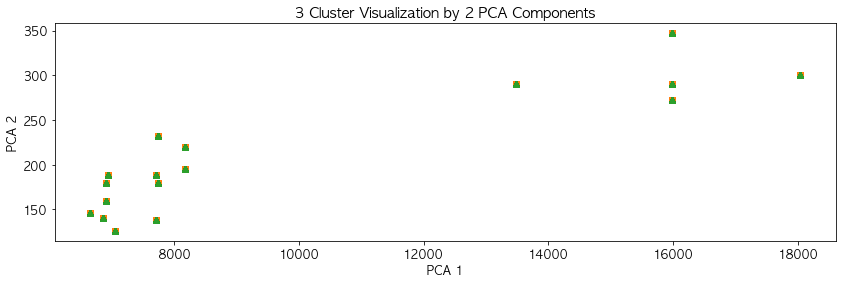

In [15]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출 
marker0_ind = data[data['cluster']==0].index
marker1_ind = data[data['cluster']==1].index
marker2_ind = data[data['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=data.loc[marker0_ind, 'total_emmission(kgCO2eq)'], y=data.loc[marker0_ind, '좌석수'], marker='o')
plt.scatter(x=data.loc[marker1_ind, 'total_emmission(kgCO2eq)'], y=data.loc[marker1_ind, '좌석수'], marker='s')
plt.scatter(x=data.loc[marker2_ind, 'total_emmission(kgCO2eq)'], y=data.loc[marker2_ind, '좌석수'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

## 2. k에 따른 실루엣 계수 시각화

In [16]:
silhouette_coeff_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0).fit(X)
    kmeans.fit_predict()
    average_score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_coeff_list.append(average_score)
plt.figure(figsize=(10, 8))
plt.plot(np.arange(2, 11), silhouette_coeff_list)
plt.xticks(np.arange(2, 10.5, 0.5))
plt.title('k에 따른 실루엣 결정 계수(평균)')
plt.show()
print('k에 따른 실루엣 계수:', silhouette_coeff_list)

TypeError: fit_predict() missing 1 required positional argument: 'X'